In [1]:
import requests
import bs4 as bs
import pandas as pd
import numpy as np
import sklearn as sl
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
token = 'This is not public.'
api_url = 'This is also not public.'

headers={'Authorization': 'Bearer %s' % token}

In [ ]:
######harshevent table######
harshevent = {"query" : "{harshevent(input:{next:{fetch:10000}}){id route_id event_datetime event_type address distracted incident_url created_datetime updated_at}}"}
r1 = requests.post(api_url, headers=headers, json=harshevent)
dic_r1 = r1.json()
harsh_df = pd.DataFrame(dic_r1["data"]["harshevent"])
harsh_df

,id,route_id,event_datetime,event_type,address,distracted,incident_url,created_datetime,updated_at
0,112,39668,2019-09-09T11:55:21Z,Harsh Braking,Olentangy Freeway; Moody Jackson Parkway (SR 3...,false,https://cloud.samsara.com/groups/18722/fleet/r...,2019-09-10T09:00:25Z,2019-09-10T09:00:25Z
1,113,40032,2019-09-11T22:43:10Z,Rolling Stop,"Sancus PTC Entrance, Columbus, OH",false,https://cloud.samsara.com/groups/18722/fleet/r...,2019-09-12T09:00:11Z,2019-09-12T09:00:11Z
2,114,40235,2019-09-12T20:20:01Z,Harsh Braking,"Olentangy Freeway, Columbus, OH",false,https://cloud.samsara.com/groups/18722/fleet/r...,2019-09-13T09:00:29Z,2019-09-13T09:00:29Z
3,115,40547,2019-09-17T11:07:15Z,Harsh Braking,"Hamilton Road, Whitehall, OH",false,https://cloud.samsara.com/groups/18722/fleet/r...,2019-09-18T09:00:59Z,2019-09-18T09:00:59Z
4,116,41175,2019-09-19T12:06:17Z,Harsh Event,"Main Street, Columbus, OH",false,https://cloud.samsara.com/groups/18722/fleet/r...,2019-09-20T09:00:34Z,2019-09-20T09:00:34Z
...,...,...,...,...,...,...,...,...,...
66,178,65950,2020-03-13T10:26:10Z,Harsh Turn,"I 71, Columbus, OH",false,https://cloud.samsara.com/groups/18722/fleet/r...,2020-03-14T09:00:14Z,2020-03-14T09:00:14Z
67,179,70603,2020-10-12T16:16:27Z,Harsh Event,"4000 Dumfries Court, Columbus, OH",false,https://cloud.samsara.com/o/17693/fleet/report...,2020-10-19T04:07:54Z,2020-10-19T04:07:54Z
68,180,70601,2020-10-12T15:28:01Z,Harsh Braking,"Muirfield Drive, Dublin, OH",false,https://cloud.samsara.com/o/17693/fleet/report...,2020-10-19T04:07:55Z,2020-10-19T04:07:55Z
69,181,70601,2020-10-12T15:28:26Z,Harsh Acceleration,"6400 Moors Place West, Dublin, OH",false,https://cloud.samsara.com/o/17693/fleet/report...,2020-10-19T04:07:55Z,2020-10-19T04:07:55Z


In [ ]:
if harsh_df["id"].duplicated().sum==0:
    print("no duplicated id")
    
#overview of numerical features
harsh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                71 non-null     int64 
 1   route_id          71 non-null     int64 
 2   event_datetime    71 non-null     object
 3   event_type        71 non-null     object
 4   address           71 non-null     object
 5   distracted        71 non-null     object
 6   incident_url      71 non-null     object
 7   created_datetime  71 non-null     object
 8   updated_at        71 non-null     object
dtypes: int64(2), object(7)
memory usage: 5.1+ KB


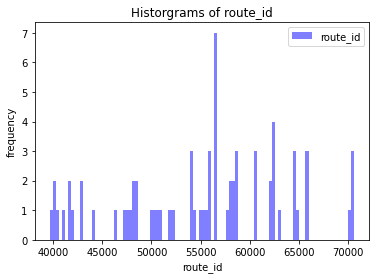

In [ ]:
plt.hist(harsh_df['route_id'],bins = 100, color='b',label='route_id',alpha=0.5)
plt.title('Historgrams of route_id')
plt.legend(loc='upper right')
plt.xlabel('route_id')
plt.ylabel('frequency')
plt.show()

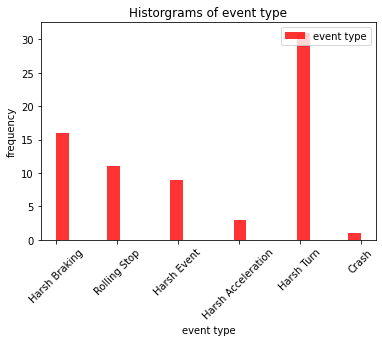

In [ ]:
plt.hist(harsh_df['event_type'], bins = 24, color='r', label='event type',alpha=0.8)
plt.title('Historgrams of event type')
plt.legend(loc='upper right')
plt.xlabel('event type')
plt.ylabel('frequency')
plt.xticks(rotation = 45)
plt.show()

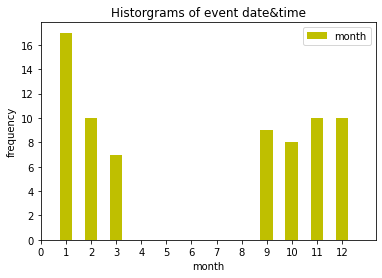

In [ ]:
harsh_df["event_month"] = pd.DatetimeIndex(harsh_df["event_datetime"]).month

plt.hist(harsh_df["event_month"],bins = 24, range = (1, 13), align = "left", color='y',label='month',alpha=1)
plt.title("Historgrams of event date&time")
plt.legend(loc="upper right")
plt.xlabel("month")
plt.ylabel("frequency")
plt.xticks(range(13))
plt.show()

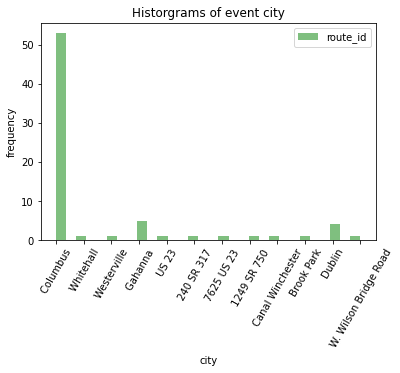

In [ ]:
address = harsh_df['address']
lst = address.values.tolist()
event_city = []
for ele in lst:
    string = ele.split(',')
    city = string[1]
    event_city.append(city)
    
harsh_df['event_city'] = np.array(event_city)

plt.hist(harsh_df['event_city'],bins = 30, color='g',label='route_id',alpha=0.5)
plt.title('Historgrams of event city')
plt.legend(loc='upper right')
plt.xlabel('city')
plt.ylabel('frequency')
plt.xticks(rotation = 60)
plt.show()

In [ ]:
organization = {"query" : "{organization(input:{next:{fetch:10000}}){organization_id type pricing_mode}}"}
r2 = requests.post(api_url, headers=headers, json=organization)
dic_r2 = r2.json()
org_df = pd.DataFrame(dic_r2["data"]["organization"])
org_df

,organization_id,type,pricing_mode
0,1,Other,Rider Paid
1,2,Senior,Organization Paid
2,8,Student,Organization Paid
3,9,Student,Organization Paid
4,12,Other,Rider Paid
5,13,Student,Split Payment
6,14,Student,Split Payment
7,17,Workforce,Organization Paid
8,20,Student,Organization Paid
9,21,Workforce,Organization Paid


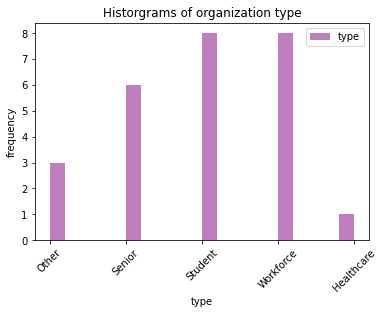

In [ ]:
plt.hist(org_df['type'],bins = 20, color='purple',label='type',alpha=0.5)
plt.title('Historgrams of organization type')
plt.legend(loc='upper right')
plt.xlabel('type')
plt.ylabel('frequency')
plt.xticks(rotation = 45)
plt.show()

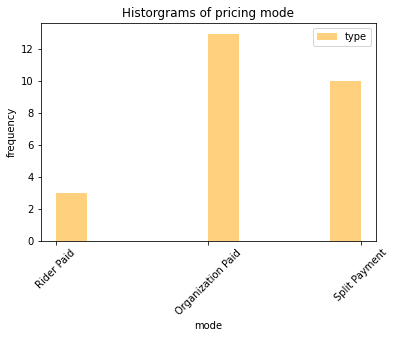

In [ ]:
plt.hist(org_df['pricing_mode'],  color='orange',label='type',alpha=0.5)
plt.title('Historgrams of pricing mode')
plt.legend(loc='upper right')
plt.xlabel('mode')
plt.ylabel('frequency')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
d_type = pd.get_dummies(org_df['type']).astype(np.int64)
d_pricing_mode = pd.get_dummies(org_df['pricing_mode']).astype(np.int64)

org_df_temp = org_df.drop(['type', 'pricing_mode'], axis=1)

org_df_new = pd.concat([org_df_temp, d_type, d_pricing_mode], axis=1)

print(org_df_new)

    organization_id  Healthcare  Other  Senior  Student  Workforce  \
0                 1           0      1       0        0          0   
1                 2           0      0       1        0          0   
2                 8           0      0       0        1          0   
3                 9           0      0       0        1          0   
4                12           0      1       0        0          0   
5                13           0      0       0        1          0   
6                14           0      0       0        1          0   
7                17           0      0       0        0          1   
8                20           0      0       0        1          0   
9                21           0      0       0        0          1   
10               22           0      1       0        0          0   
11               24           0      0       0        1          0   
12               26           0      0       1        0          0   
13               27 

In [ ]:
triprequest = {"query" : "{triprequest(input:{next:{fetch:10000}}){id scheduled_ts pickup_ts pickup_address dropoff_ts dropoff_address requested_ts created_by special_assistance organization_id status estimated_miles fare discount route_id updated_at}}"}
r3 = requests.post(api_url, headers=headers, json=triprequest)
dic_r3 = r3.json()
tripreq_df = pd.DataFrame(dic_r3["data"]["triprequest"])
tripreq_df

,id,scheduled_ts,pickup_ts,pickup_address,dropoff_ts,dropoff_address,requested_ts,created_by,special_assistance,organization_id,status,estimated_miles,fare,discount,route_id,updated_at
0,286014,2019-09-14T11:35:00Z,2019-09-14T11:36:46Z,"50 N 3rd St, Columbus, OH 43215, USA",2019-09-14T11:59:36Z,"1356 Cherry Way Drive, Gahanna, OH, USA",2019-09-03T19:59:43Z,589,false,22,Completed,11.8,14.00,0.00,39152.0,2019-09-14T11:59:36Z
1,286015,2019-09-14T14:30:00Z,2019-09-14T16:16:39Z,"1356 Cherry Way Dr, Gahanna, OH 43230, USA",2019-09-14T16:16:53Z,"50 North 3rd Street, Columbus, OH, USA",2019-09-03T20:00:32Z,589,false,22,Completed,11.1,14.00,0.00,39154.0,2019-09-14T16:16:53Z
2,286016,2019-09-14T16:00:00Z,2019-09-14T15:07:03Z,"50 N 3rd St, Columbus, OH 43215, USA",2019-09-14T16:22:17Z,"1420 Grandview Avenue, Columbus, OH, USA",2019-09-03T20:01:56Z,589,false,22,Completed,4.0,8.00,0.00,39159.0,2019-09-14T16:22:17Z
3,286017,2019-09-14T16:20:00Z,2019-09-14T16:44:07Z,"1403 Chesapeake Avenue, Columbus, OH, USA",2019-09-14T16:51:03Z,"1420 Grandview Ave, Columbus, OH 43212, USA",2019-09-03T20:03:50Z,589,false,22,Completed,0.9,8.00,0.00,39158.0,2019-09-14T16:51:03Z
4,287251,2019-09-16T14:30:00Z,2019-09-16T14:43:51Z,"30147 Detroit Rd, Westlake, OH 44145, USA",2019-09-16T14:48:51Z,"31001 Clemens Rd, Westlake, OH 44145, USA",2019-09-07T20:14:33Z,14814,false,70,Completed,1.5,6.79,1.22,40639.0,2019-09-16T14:48:51Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,438540,2020-09-23T10:00:00Z,2020-09-23T10:15:37Z,"2141 Fairwood Ave, Columbus, OH 43207, USA",2020-09-23T10:15:37Z,"40 West Long Street, Columbus, OH, USA",2020-09-22T12:37:17Z,685,false,97,No Show,3.9,11.07,1.11,70063.0,2020-09-23T10:15:37Z
4995,438541,2020-09-24T10:00:00Z,2020-09-24T10:07:23Z,"2141 Fairwood Ave, Columbus, OH 43207, USA",2020-09-24T10:26:45Z,"40 West Long Street, Columbus, OH, USA",2020-09-22T12:37:17Z,685,false,97,Completed,3.9,11.07,1.11,70181.0,2020-09-24T10:26:45Z
4996,438542,2020-09-25T10:00:00Z,2020-09-25T10:06:28Z,"2141 Fairwood Ave, Columbus, OH 43207, USA",2020-09-25T10:25:40Z,"40 West Long Street, Columbus, OH, USA",2020-09-22T12:37:17Z,685,false,97,Completed,3.9,11.07,1.11,70139.0,2020-09-25T10:25:40Z
4997,438556,2020-09-23T21:15:00Z,2020-09-23T21:18:22Z,"844 Bryden Rd, Columbus, OH 43205, USA",2020-09-23T21:29:33Z,"2141 Fairwood Avenue, Columbus, OH, USA",2020-09-23T00:09:19Z,685,false,97,Completed,3.0,14.00,0.00,70180.0,2020-09-23T21:29:33Z


In [ ]:
#check duplicated id
tripreq_df[tripreq_df['id'].duplicated(keep=False)]
#drop duplicates and missing values
tripreq_new = tripreq_df.drop_duplicates(subset = ['id'], keep = 'first', inplace = False).dropna()
tripreq_new

,id,scheduled_ts,pickup_ts,pickup_address,dropoff_ts,dropoff_address,requested_ts,created_by,special_assistance,organization_id,status,estimated_miles,fare,discount,route_id,updated_at
0,286014,2019-09-14T11:35:00Z,2019-09-14T11:36:46Z,"50 N 3rd St, Columbus, OH 43215, USA",2019-09-14T11:59:36Z,"1356 Cherry Way Drive, Gahanna, OH, USA",2019-09-03T19:59:43Z,589,false,22,Completed,11.8,14.00,0.00,39152.0,2019-09-14T11:59:36Z
1,286015,2019-09-14T14:30:00Z,2019-09-14T16:16:39Z,"1356 Cherry Way Dr, Gahanna, OH 43230, USA",2019-09-14T16:16:53Z,"50 North 3rd Street, Columbus, OH, USA",2019-09-03T20:00:32Z,589,false,22,Completed,11.1,14.00,0.00,39154.0,2019-09-14T16:16:53Z
2,286016,2019-09-14T16:00:00Z,2019-09-14T15:07:03Z,"50 N 3rd St, Columbus, OH 43215, USA",2019-09-14T16:22:17Z,"1420 Grandview Avenue, Columbus, OH, USA",2019-09-03T20:01:56Z,589,false,22,Completed,4.0,8.00,0.00,39159.0,2019-09-14T16:22:17Z
3,286017,2019-09-14T16:20:00Z,2019-09-14T16:44:07Z,"1403 Chesapeake Avenue, Columbus, OH, USA",2019-09-14T16:51:03Z,"1420 Grandview Ave, Columbus, OH 43212, USA",2019-09-03T20:03:50Z,589,false,22,Completed,0.9,8.00,0.00,39158.0,2019-09-14T16:51:03Z
4,287251,2019-09-16T14:30:00Z,2019-09-16T14:43:51Z,"30147 Detroit Rd, Westlake, OH 44145, USA",2019-09-16T14:48:51Z,"31001 Clemens Rd, Westlake, OH 44145, USA",2019-09-07T20:14:33Z,14814,false,70,Completed,1.5,6.79,1.22,40639.0,2019-09-16T14:48:51Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,438540,2020-09-23T10:00:00Z,2020-09-23T10:15:37Z,"2141 Fairwood Ave, Columbus, OH 43207, USA",2020-09-23T10:15:37Z,"40 West Long Street, Columbus, OH, USA",2020-09-22T12:37:17Z,685,false,97,No Show,3.9,11.07,1.11,70063.0,2020-09-23T10:15:37Z
4995,438541,2020-09-24T10:00:00Z,2020-09-24T10:07:23Z,"2141 Fairwood Ave, Columbus, OH 43207, USA",2020-09-24T10:26:45Z,"40 West Long Street, Columbus, OH, USA",2020-09-22T12:37:17Z,685,false,97,Completed,3.9,11.07,1.11,70181.0,2020-09-24T10:26:45Z
4996,438542,2020-09-25T10:00:00Z,2020-09-25T10:06:28Z,"2141 Fairwood Ave, Columbus, OH 43207, USA",2020-09-25T10:25:40Z,"40 West Long Street, Columbus, OH, USA",2020-09-22T12:37:17Z,685,false,97,Completed,3.9,11.07,1.11,70139.0,2020-09-25T10:25:40Z
4997,438556,2020-09-23T21:15:00Z,2020-09-23T21:18:22Z,"844 Bryden Rd, Columbus, OH 43205, USA",2020-09-23T21:29:33Z,"2141 Fairwood Avenue, Columbus, OH, USA",2020-09-23T00:09:19Z,685,false,97,Completed,3.0,14.00,0.00,70180.0,2020-09-23T21:29:33Z


In [ ]:
from datetime import datetime

t_s = tripreq_new['scheduled_ts'].values.tolist()
t_pick = tripreq_new['pickup_ts'].values.tolist()
t_drop = tripreq_new['dropoff_ts'].values.tolist()
t_req = tripreq_new['requested_ts'].values.tolist()

wait_time = []
trip_duration = []
request_process = []

for a in range(len(tripreq_new['id'])):
    ts_new = datetime.strptime(t_s[a], "%Y-%m-%dT%H:%M:%SZ")
    tpick_new = datetime.strptime(t_pick[a], "%Y-%m-%dT%H:%M:%SZ")
    tdrop_new = datetime.strptime(t_drop[a], "%Y-%m-%dT%H:%M:%SZ")
    treq_new = datetime.strptime(t_req[a], "%Y-%m-%dT%H:%M:%SZ")
    
    wait = (tpick_new - ts_new).total_seconds()
    wait_time.append(wait)
    
    d = (tdrop_new - tpick_new).total_seconds()
    trip_duration.append(d)
    
    req = (ts_new - treq_new).total_seconds()
    request_process.append(req)

tripreq_new['wait_time'] = wait_time
tripreq_new['trip_duration'] = trip_duration
tripreq_new['request_process time'] = request_process


tripreq_new

,id,scheduled_ts,pickup_ts,pickup_address,dropoff_ts,dropoff_address,requested_ts,created_by,special_assistance,organization_id,status,estimated_miles,fare,discount,route_id,updated_at,wait_time,trip_duration,request_process time
0,286014,2019-09-14T11:35:00Z,2019-09-14T11:36:46Z,"50 N 3rd St, Columbus, OH 43215, USA",2019-09-14T11:59:36Z,"1356 Cherry Way Drive, Gahanna, OH, USA",2019-09-03T19:59:43Z,589,false,22,Completed,11.8,14.00,0.00,39152.0,2019-09-14T11:59:36Z,106.0,1370.0,920117.0
1,286015,2019-09-14T14:30:00Z,2019-09-14T16:16:39Z,"1356 Cherry Way Dr, Gahanna, OH 43230, USA",2019-09-14T16:16:53Z,"50 North 3rd Street, Columbus, OH, USA",2019-09-03T20:00:32Z,589,false,22,Completed,11.1,14.00,0.00,39154.0,2019-09-14T16:16:53Z,6399.0,14.0,930568.0
2,286016,2019-09-14T16:00:00Z,2019-09-14T15:07:03Z,"50 N 3rd St, Columbus, OH 43215, USA",2019-09-14T16:22:17Z,"1420 Grandview Avenue, Columbus, OH, USA",2019-09-03T20:01:56Z,589,false,22,Completed,4.0,8.00,0.00,39159.0,2019-09-14T16:22:17Z,-3177.0,4514.0,935884.0
3,286017,2019-09-14T16:20:00Z,2019-09-14T16:44:07Z,"1403 Chesapeake Avenue, Columbus, OH, USA",2019-09-14T16:51:03Z,"1420 Grandview Ave, Columbus, OH 43212, USA",2019-09-03T20:03:50Z,589,false,22,Completed,0.9,8.00,0.00,39158.0,2019-09-14T16:51:03Z,1447.0,416.0,936970.0
4,287251,2019-09-16T14:30:00Z,2019-09-16T14:43:51Z,"30147 Detroit Rd, Westlake, OH 44145, USA",2019-09-16T14:48:51Z,"31001 Clemens Rd, Westlake, OH 44145, USA",2019-09-07T20:14:33Z,14814,false,70,Completed,1.5,6.79,1.22,40639.0,2019-09-16T14:48:51Z,831.0,300.0,756927.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,438540,2020-09-23T10:00:00Z,2020-09-23T10:15:37Z,"2141 Fairwood Ave, Columbus, OH 43207, USA",2020-09-23T10:15:37Z,"40 West Long Street, Columbus, OH, USA",2020-09-22T12:37:17Z,685,false,97,No Show,3.9,11.07,1.11,70063.0,2020-09-23T10:15:37Z,937.0,0.0,76963.0
4995,438541,2020-09-24T10:00:00Z,2020-09-24T10:07:23Z,"2141 Fairwood Ave, Columbus, OH 43207, USA",2020-09-24T10:26:45Z,"40 West Long Street, Columbus, OH, USA",2020-09-22T12:37:17Z,685,false,97,Completed,3.9,11.07,1.11,70181.0,2020-09-24T10:26:45Z,443.0,1162.0,163363.0
4996,438542,2020-09-25T10:00:00Z,2020-09-25T10:06:28Z,"2141 Fairwood Ave, Columbus, OH 43207, USA",2020-09-25T10:25:40Z,"40 West Long Street, Columbus, OH, USA",2020-09-22T12:37:17Z,685,false,97,Completed,3.9,11.07,1.11,70139.0,2020-09-25T10:25:40Z,388.0,1152.0,249763.0
4997,438556,2020-09-23T21:15:00Z,2020-09-23T21:18:22Z,"844 Bryden Rd, Columbus, OH 43205, USA",2020-09-23T21:29:33Z,"2141 Fairwood Avenue, Columbus, OH, USA",2020-09-23T00:09:19Z,685,false,97,Completed,3.0,14.00,0.00,70180.0,2020-09-23T21:29:33Z,202.0,671.0,75941.0


In [ ]:
from geopy.geocoders import Nominatim

#PickUp_Latitude, PickUp_Longitude, DropOff_Latitude and DropOff_Longitude

pickup_latitude = []
pickup_longitude = []
pickup_loc = tripreq_new['pickup_address']
for i in range(len(pickup_loc)):
    geolocator = Nominatim(user_agent="my-application")
    loc = geolocator.geocode(str(pickup_loc[i]))
    pickup_latitude.append(loc.latitude)
    pickup_longitude.append(loc.longitude)
    
tripreq_new['pickup_latitude'] = pickup_latitude
tripreq_new['pickup_longitude'] = pickup_longitude

tripreq_new

AttributeError: 'NoneType' object has no attribute 'latitude'

In [ ]:
from geopy.geocoders import Nominatim
pickup_loc = tripreq_new['pickup_address']
geolocator = Nominatim(user_agent="my-application")
loc = geolocator.geocode(pickup_loc[1])
print(loc.latitude, loc.longitude)

AttributeError: 'NoneType' object has no attribute 'latitude'

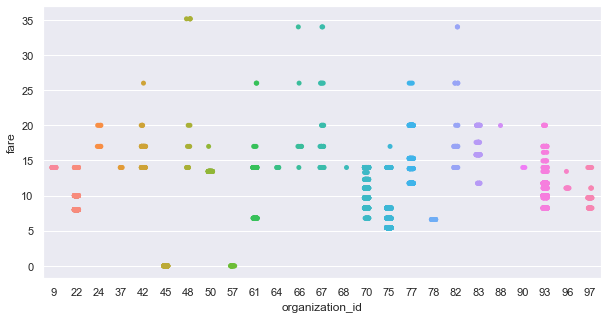

75    2246
70     777
93     655
22     408
77     226
45     104
50      89
61      82
83      69
42      68
97      63
82      35
67      34
78      32
9       22
57      15
48      15
24      10
96       9
66       8
64       6
37       5
90       2
88       1
68       1
Name: organization_id, dtype: int64


In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,5)})
sns.stripplot(x='organization_id', y='fare', data = tripreq_new, jitter=True)
plt.show()
print(tripreq_new['organization_id'].value_counts())

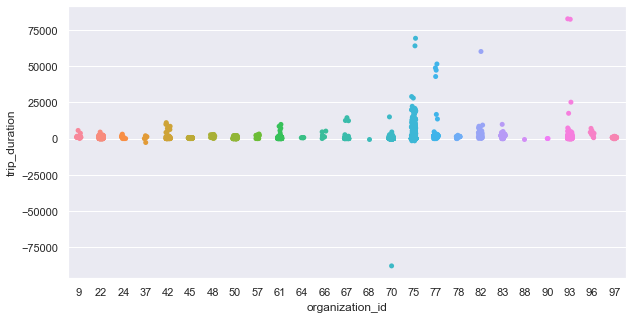

75    2246
70     777
93     655
22     408
77     226
45     104
50      89
61      82
83      69
42      68
97      63
82      35
67      34
78      32
9       22
57      15
48      15
24      10
96       9
66       8
64       6
37       5
90       2
88       1
68       1
Name: organization_id, dtype: int64


In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
sns.stripplot(x='organization_id', y='trip_duration', data = tripreq_new, jitter=True)
plt.show()
print(tripreq_new['organization_id'].value_counts())

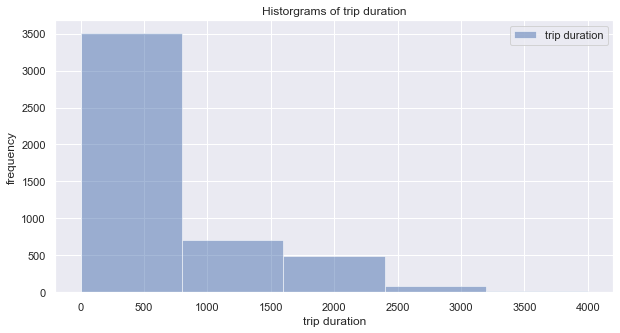

In [ ]:
plt.hist(tripreq_new['trip_duration'],bins = 5, range = (0, 4000), color='b',label='trip duration',alpha=0.5)
plt.title('Historgrams of trip duration')
plt.legend(loc='upper right')
plt.xlabel('trip duration')
plt.ylabel('frequency')
plt.show()

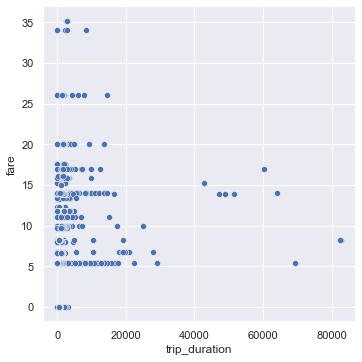

In [ ]:
ooc_duration = tripreq_new['trip_duration'] < 0
tripreq_new.loc[ooc_duration, 'trip_duration'] = np.nan
tripreq_new.dropna()
sns.relplot(x=tripreq_new['trip_duration'], y=tripreq_new['fare'], data=tripreq_new)

In [ ]:
route_df = pd.read_csv('route.csv') 
route_df

,Unnamed: 0,id,name,driver_id,start_ts,end_ts,vehicle_id,ambulatory_riders,handicapped_riders,total_riders,status,updated_at
0,0,39152,C-RJT,3320,2019-09-14T11:12:54Z,2019-09-14T11:59:35Z,51,1,0,1,Completed,2019-09-14T11:59:36Z
1,1,39154,C-RJV,3320,2019-09-14T16:16:20Z,2019-09-14T16:16:53Z,51,1,0,1,Completed,2019-09-14T16:16:53Z
2,2,39159,C-RK2,3320,2019-09-14T14:43:42Z,2019-09-14T16:22:17Z,51,1,0,1,Completed,2019-09-14T16:22:17Z
3,3,39158,C-RJZ,3320,2019-09-14T16:38:29Z,2019-09-14T16:51:03Z,51,1,0,1,Completed,2019-09-14T16:51:03Z
4,4,40639,C-TZA,2622,2019-09-16T12:31:14Z,2019-09-16T14:48:50Z,55,6,0,6,Completed,2019-09-17T09:00:28Z
...,...,...,...,...,...,...,...,...,...,...,...,...
1135,1135,68128,Red PM Route 1,17322,2020-07-16T18:08:37Z,2020-07-16T18:45:38Z,149,2,0,2,Completed,2020-07-16T18:45:39Z
1136,1136,68170,Red PM Route 1,17329,2020-07-20T18:15:42Z,2020-07-20T18:50:45Z,149,2,0,2,Completed,2020-07-20T18:50:46Z
1137,1137,68206,Red PM Route 1,17322,2020-07-21T18:07:25Z,2020-07-21T18:46:51Z,149,2,0,2,Completed,2020-07-21T18:46:51Z
1138,1138,68241,Red PM Route 1,17329,2020-07-22T18:48:42Z,2020-07-22T19:10:49Z,149,2,0,2,Completed,2020-07-22T19:10:49Z


In [ ]:
safety_df = pd.read_csv('safetydetail.csv') 
safety_df

,Unnamed: 0,vehicle_id,driver_id,route_id,safety_score,safety_score_rank,total_distance_driven,harsh_turning_events,harsh_braking_events,harsh_acceleration_events,updated_at
0,0,55,2622,40639,100,6,15.68,NaN,NaN,NaN,2019-09-17T09:00:28Z
1,1,46,2622,42092,100,9,15.77,NaN,NaN,NaN,2019-09-26T09:00:06Z
2,2,52,2622,42457,100,16,3.29,NaN,NaN,NaN,2019-10-01T09:01:27Z
3,3,55,2699,43209,100,7,31.41,NaN,NaN,NaN,2019-10-04T09:00:12Z
4,4,52,2622,43576,100,12,32.57,NaN,NaN,NaN,2019-10-08T09:00:17Z
...,...,...,...,...,...,...,...,...,...,...,...
635,635,50,15602,65796,99,4,18.74,NaN,NaN,NaN,2020-03-12T09:00:03Z
636,636,53,15643,65973,98,18,11.68,NaN,NaN,NaN,2020-03-14T09:00:05Z
637,637,53,15715,65974,100,14,15.16,NaN,NaN,NaN,2020-03-14T09:00:04Z
638,638,53,16689,65975,96,5,17.54,NaN,NaN,NaN,2020-03-14T09:00:04Z


In [ ]:
vehicle = {"query" : "{vehicle(input:{next:{fetch:10000}}){id vin name make model year capacity handicapped updated_at}}"}
r6 = requests.post(api_url, headers=headers, json=vehicle)
dic_r6 = r6.json()
dic_r6
vehicle_df = pd.DataFrame(dic_r6["data"]["vehicle"])
vehicle_df

,id,vin,name,make,model,year,capacity,handicapped,updated_at
0,1,2F***************,01-H-0004,Ford,Flex,2018,6,0,2019-10-30T09:53:29Z
1,2,WD***************,01-A-0016,Mercedes,Metris,2018,7,0,2019-10-23T19:01:38Z
2,5,5F***************,01-A-0002,Honda,Odyssey,2018,7,0,2020-07-17T18:42:09Z
3,8,5F***************,02-A-0007,Honda,Odyssey,2011,7,0,2019-11-15T19:11:00Z
4,9,1F***************,01-E-0001,Ford,,2018,6,0,2019-11-25T17:10:43Z
...,...,...,...,...,...,...,...,...,...
112,176,12***************,2152A,Ford,Bus,2019,24,12,2020-09-16T19:41:21Z
113,177,1f***************,245A,fort,tranist,2019,24,12,2020-09-16T19:41:30Z
114,178,1f***************,c001,ford,transit,2018,14,2,2020-09-16T15:35:15Z
115,179,1f***************,001,Ford,Transit,2018,14,2,2020-09-16T17:18:59Z


In [ ]:
vehiclediagnostic = {"query" : "{vehiclediagnostic(input:{next:{fetch:1000000}}){vehicle_id event_timestamp check_engine_light dtc_shortcode dtc_id dtc_id2 dtc_description}}"}
r7 = requests.post(api_url, headers=headers, json=vehiclediagnostic)
dic_r7 = r7.json()
vdiag_df = pd.DataFrame(dic_r7["data"]["vehiclediagnostic"])
vdiag_df

,vehicle_id,event_timestamp,check_engine_light,dtc_shortcode,dtc_id,dtc_id2,dtc_description
0,1,2018-12-06T00:54:13.573Z,False,None,NaN,NaN,None
1,1,2018-12-06T00:58:36.078Z,False,None,NaN,NaN,None
2,1,2018-12-06T01:02:32.244Z,False,None,NaN,NaN,None
3,1,2018-12-07T00:58:41.39Z,False,None,NaN,NaN,None
4,1,2018-12-07T01:31:18.057Z,False,None,NaN,NaN,None
...,...,...,...,...,...,...,...
133855,84,2019-12-09T10:00:05.936Z,False,None,NaN,NaN,None
133856,84,2019-12-10T10:00:05.956Z,False,P0457,1111.0,1111.0,EVAP System Leak Detected (fuel cap loose/off)
133857,84,2019-12-11T10:00:05.605Z,False,P0457,1111.0,1111.0,EVAP System Leak Detected (fuel cap loose/off)
133858,84,2019-12-12T10:00:05.413Z,False,None,NaN,NaN,None


In [ ]:
veloc_df = pd.read_csv('vehiclelocation.csv') 
veloc_df

FileNotFoundError: [Errno 2] No such file or directory: 'vehiclelocation.csv'